# **Forecasting HIV Trends in Singapore (1985–2023) using ARIMA Modelling**

**Project Statement**

This project focuses on analyzing the temporal trends of HIV cases in Singapore from 1985 to 2023 using the ARIMA (AutoRegressive Integrated Moving Average) model. HIV remains a critical public health challenge, with its epidemiology evolving over the decades. By applying ARIMA, this project aims to uncover patterns in historical data, provide accurate forecasts for future trends, and support evidence-based policy-making and resource planning to combat HIV effectively.

**Objective:**

1. To preprocess and analyze historical HIV case data in Singapore from 1985 to 2023.
2. To determine the optimal ARIMA model parameters (p, d, q) for accurately capturing the trends in HIV cases.
3. To validate the model using performance metrics AIC and BIC for reliability.
4. To forecast HIV case trends for the coming years, aiding public health initiatives and long-term strategic planning.

In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## **Data Preprocessing**

In [109]:
# read the HIV data from a CSV file
hiv_df = pd.read_csv("hiv_sg.csv")
# display the first few rows of the dataframe 
hiv_df

,DataSeries,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
0,Total Number Of Singapore Residents Reported W...,209.0,202.0,250.0,261.0,323.0,313.0,434.0,408.0,455.0,...,86,64,55,42,17,10,15,10,7,2
1,Male,199.0,187.0,238.0,241.0,308.0,290.0,408.0,380.0,423.0,...,76,58,49,39,17,9,15,10,6,2
2,Female,10.0,15.0,12.0,20.0,15.0,23.0,26.0,28.0,32.0,...,10,6,6,3,0,1,0,0,1,0
3,HIV Prevalence Among Singapore Residents Aged ...,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,...,na,na,na,na,na,na,na,na,na,na


In [110]:
# set the "DataSeries" column as the index of the dataframe 
hiv_df.set_index("DataSeries", inplace = True)

In [111]:
# transpose the dataframe
hiv_df = hiv_df.T

# display the transposed dataframe 
hiv_df

DataSeries,Total Number Of Singapore Residents Reported With HIV/AIDS,Male,Female,HIV Prevalence Among Singapore Residents Aged 15-49 Years
2023,209.0,199.0,10.0,0.1
2022,202.0,187.0,15.0,0.2
2021,250.0,238.0,12.0,0.2
2020,261.0,241.0,20.0,0.2
2019,323.0,308.0,15.0,0.2
2018,313.0,290.0,23.0,0.2
2017,434.0,408.0,26.0,0.2
2016,408.0,380.0,28.0,0.3
2015,455.0,423.0,32.0,0.3
2014,456.0,422.0,34.0,0.3


In [112]:
# remove the irrelevant columns from the dataframe
hiv_df = hiv_df.drop(columns = ["    Male", "    Female", "HIV Prevalence Among Singapore Residents Aged 15-49 Years"], axis = 1)
# displayed the dataframe 
hiv_df

DataSeries,Total Number Of Singapore Residents Reported With HIV/AIDS
2023,209.0
2022,202.0
2021,250.0
2020,261.0
2019,323.0
2018,313.0
2017,434.0
2016,408.0
2015,455.0
2014,456.0


In [113]:
# rename the 'Total Number Of Singapore Residents Reported With HIV/AIDS' column 
hiv_df.columns = ['Number of HIV Cases']

In [114]:
# reset the index and name the new column as "Year"
hiv_df = hiv_df.reset_index(names = "Year")

# display the dataframe with the reset index 
hiv_df

,Year,Number of HIV Cases
0,2023,209.0
1,2022,202.0
2,2021,250.0
3,2020,261.0
4,2019,323.0
5,2018,313.0
6,2017,434.0
7,2016,408.0
8,2015,455.0
9,2014,456.0


In [115]:
# check the dataset info 
hiv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 39 non-null     object
 1   Number of HIV Cases  39 non-null     object
dtypes: object(2)
memory usage: 756.0+ bytes


In [116]:
# convert both year and number of HIV cases to integer data types 
hiv_df = hiv_df.astype({'Year': object, 
                        'Number of HIV Cases': int})

In [117]:
# check the dataset info 
hiv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 39 non-null     object
 1   Number of HIV Cases  39 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 756.0+ bytes


In [118]:
# sort the dataframe by the "year" columns 
hiv_df = hiv_df.sort_values(by = ['Year'])

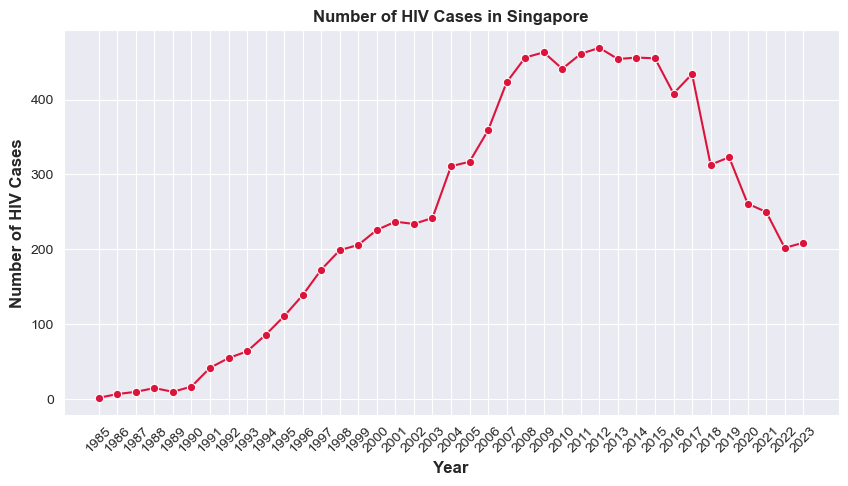

In [119]:
# create a line plot to show the trend of the HIV cases
plt.figure(figsize = (10, 5))
sns.set_style("darkgrid")
sns.lineplot(x = "Year", 
             y = "Number of HIV Cases", 
             data = hiv_df, 
             color = "crimson",
             marker = "o")
plt.xticks(rotation = 45)
plt.title("Number of HIV Cases in Singapore", 
          fontsize = 12, 
          fontweight = "bold")
plt.xlabel("Year", 
           fontsize = 12, 
           fontweight = "bold")
plt.ylabel("Number of HIV Cases", 
           fontsize = 12, 
           fontweight = "bold")
plt.show()

## **Data Analysis**

### **1. Summary Statistics**

In [120]:
# provides summary statistics for the number of HIV cases 
hiv_df.describe()

,Number of HIV Cases
count,39.000000
mean,244.615385
std,161.829933
min,2.000000
25%,98.500000
50%,237.000000
75%,415.500000
max,469.000000


### **2. Line Plot**

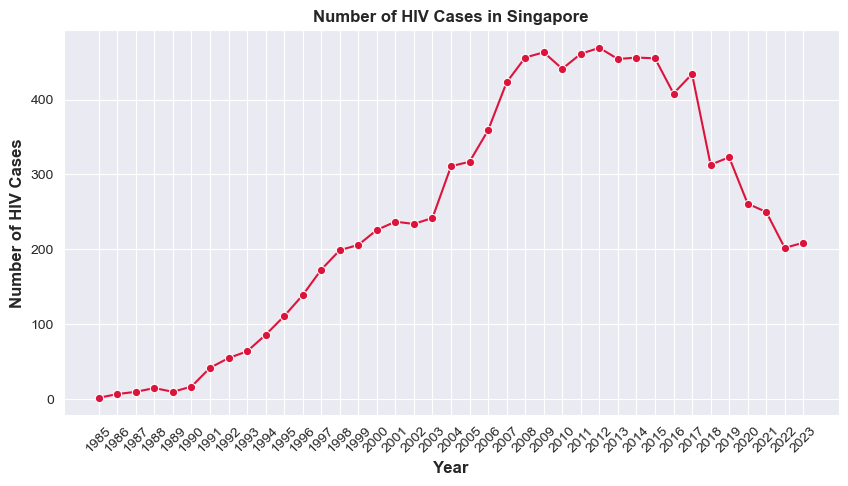

In [121]:
# create a line plot to show HIV cases trend 
plt.figure(figsize = (10, 5))
sns.set_style("darkgrid")
sns.lineplot(x = "Year", 
             y = "Number of HIV Cases", 
             data = hiv_df, 
             color = "crimson",
             marker = "o")
plt.xticks(rotation = 45)
plt.title("Number of HIV Cases in Singapore", 
          fontsize = 12, 
          fontweight = "bold")
plt.xlabel("Year", 
           fontsize = 12, 
           fontweight = "bold")
plt.ylabel("Number of HIV Cases", 
           fontsize = 12, 
           fontweight = "bold")
plt.show()

### **3. Density Plots**

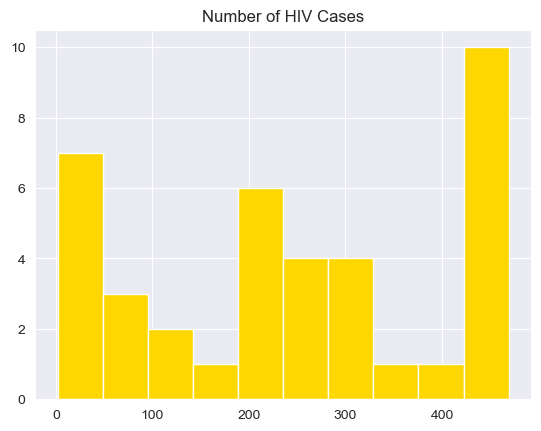

In [122]:
# create histogram of HIV cases distribution 
hiv_df.hist(color = "gold")
plt.show()

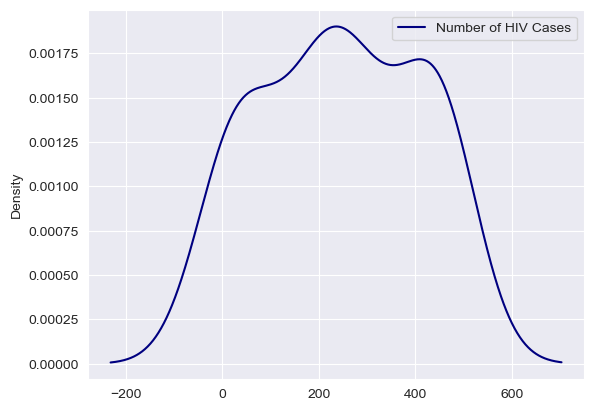

In [123]:
# create kernel density estimation (KDE) plot of HIV cases 
hiv_df.plot(color = "navy", kind = "kde")
plt.show()

## **Initial Modelling: Manually Configured ARIMA**

##### **Differencing (d)**

In [124]:
# create a differenced series by calculating the difference between consecutive values in a given dataset. 
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i-1]
        diff.append(value)
    return pd.Series(diff)

##### **First Differencing**

In [125]:
# extract data from dataframes
X = hiv_df['Number of HIV Cases']
# convert the data type to float32 
X = X.astype("float32")
# call the function to create the first-order differenced series 
firstDiff = difference(X)
# display the first differencing data 
firstDiff


0      -7.0
1      48.0
2      11.0
3      62.0
4     -10.0
5     121.0
6     -26.0
7      47.0
8       1.0
9      -2.0
10     15.0
11     -8.0
12    -20.0
13     22.0
14     -7.0
15    -33.0
16    -64.0
17    -42.0
18     -6.0
19    -69.0
20     -8.0
21      3.0
22    -11.0
23    -20.0
24     -7.0
25    -26.0
26    -34.0
27    -28.0
28    -25.0
29    -22.0
30     -9.0
31    -13.0
32    -25.0
33     -7.0
34      5.0
35     -5.0
36     -3.0
37     -5.0
dtype: float32

In [126]:
# perform ADF test on the first differenced series
result = adfuller(firstDiff)

# display ADF statistics and p-value 
print("ADF Statistics: {:.4f}".format(result[0]))
print("p-value: {:.4f}".format(result[1]))

# display critical values for different confidence levels 
for key, value in result[4].items():
    print("\t{}: {:.3f}".format(key, value))

# p-value = 0.000 < 0.05, the time series is not stationary at first differencing. 

ADF Statistics: -5.4130
p-value: 0.0000
	1%: -3.621
	5%: -2.944
	10%: -2.610


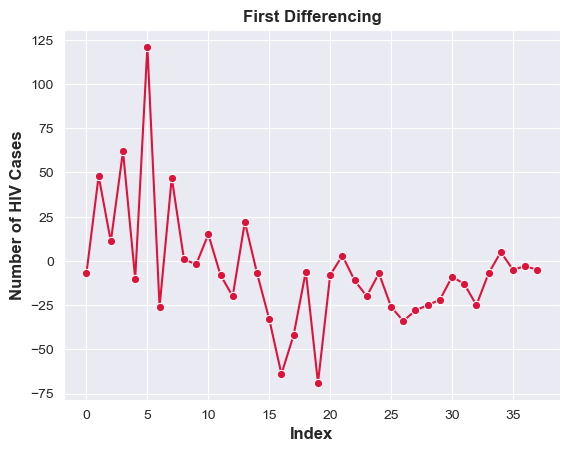

In [127]:
sns.lineplot(firstDiff, marker = "o", color = "crimson")
plt.title("First Differencing", fontweight = "bold", fontsize = 12)
plt.xlabel("Index", fontweight = "bold", fontsize = 12)
plt.ylabel("Number of HIV Cases", fontweight = "bold", fontsize = 12)
plt.show()

##### **ACF Plot (p) for First Differencing**

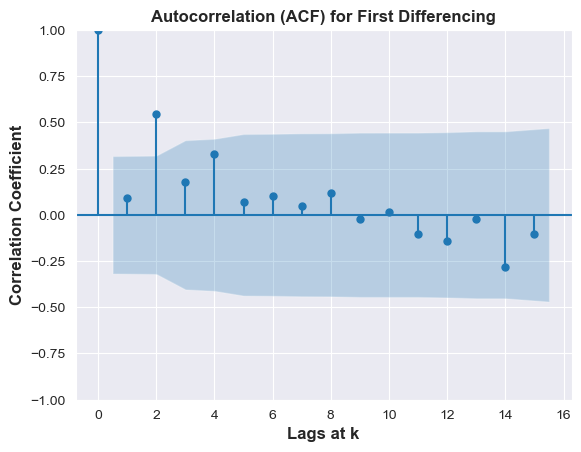

In [128]:
plot_acf(firstDiff, lags = 15)
plt.title("Autocorrelation (ACF) for First Differencing", fontweight = "bold", fontsize = 12)
plt.xlabel("Lags at k", fontweight = "bold", fontsize = 12)
plt.ylabel("Correlation Coefficient", fontweight = "bold", fontsize = 12)
plt.show()

# the ACF shows significant lags to 1 steps 

##### **PACF Plot (q) for First Differencing**

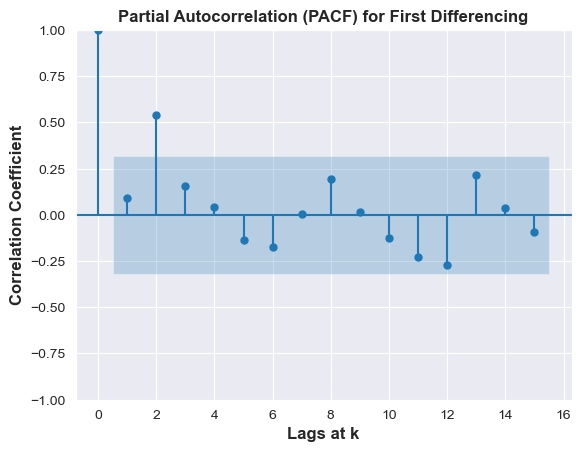

In [129]:
plot_pacf(firstDiff, lags = 15)
plt.title("Partial Autocorrelation (PACF) for First Differencing", fontweight = "bold", fontsize = 12)
plt.xlabel("Lags at k", fontweight = "bold", fontsize = 12)
plt.ylabel("Correlation Coefficient", fontweight = "bold", fontsize = 12)
plt.show()

# the PACF shows significant lags to 1 time steps 

##### **Second Differencing**

In [130]:
# extract data from dataframes
X = firstDiff
# convert the data type to float32 
X = X.astype("float32")
# call the function to create the first-order differenced series 
secondDiff = difference(X)

secondDiff

0      55.0
1     -37.0
2      51.0
3     -72.0
4     131.0
5    -147.0
6      73.0
7     -46.0
8      -3.0
9      17.0
10    -23.0
11    -12.0
12     42.0
13    -29.0
14    -26.0
15    -31.0
16     22.0
17     36.0
18    -63.0
19     61.0
20     11.0
21    -14.0
22     -9.0
23     13.0
24    -19.0
25     -8.0
26      6.0
27      3.0
28      3.0
29     13.0
30     -4.0
31    -12.0
32     18.0
33     12.0
34    -10.0
35      2.0
36     -2.0
dtype: float32

In [131]:
# perform ADF test on the first differenced series
result2 = adfuller(secondDiff)

# display ADF statistics and p-value 
print("ADF Statistics: {:.4f}".format(result2[0]))
print("p-value: {:.4f}".format(result2[1]))

# display critical values for different confidence levels 
for key, value in result2[4].items():
    print("\t{}: {:.3f}".format(key, value))

# p-value = 0.000 < 0.05, the time series is stationary at second differencing. 

ADF Statistics: -7.1246
p-value: 0.0000
	1%: -3.633
	5%: -2.949
	10%: -2.613


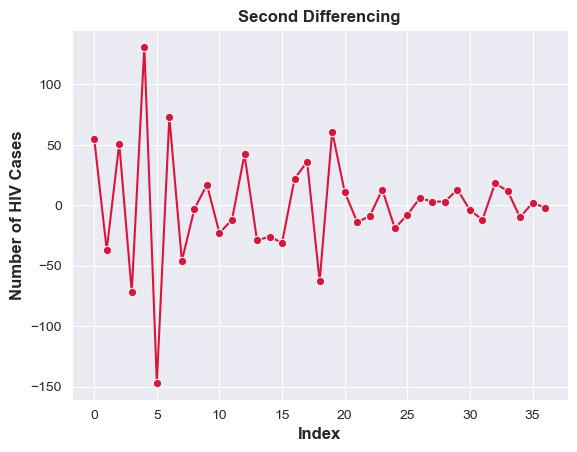

In [132]:
sns.lineplot(secondDiff, marker = "o", color = "crimson")
plt.title("Second Differencing", fontweight = "bold", fontsize = 12)
plt.xlabel("Index", fontweight = "bold", fontsize = 12)
plt.ylabel("Number of HIV Cases", fontweight = "bold", fontsize = 12)
plt.show()

##### **ACF Plot (p) for Second Differencing**

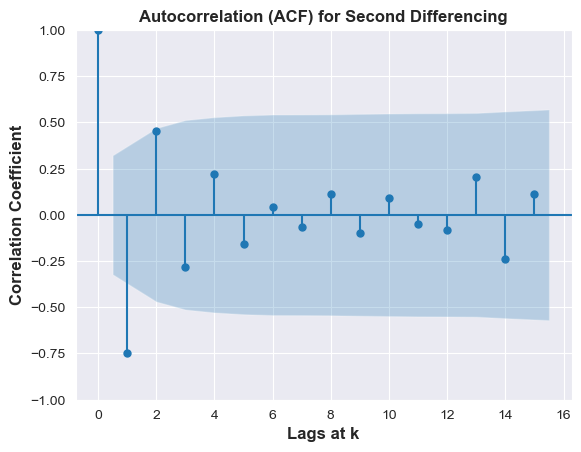

In [133]:
plot_acf(secondDiff, lags = 15)
plt.title("Autocorrelation (ACF) for Second Differencing", fontweight = "bold", fontsize = 12)
plt.xlabel("Lags at k", fontweight = "bold", fontsize = 12)
plt.ylabel("Correlation Coefficient", fontweight = "bold", fontsize = 12)
plt.show()

# the ACF shows significant lags to 1 steps 

##### **PACF Plot (q) for Second Differencing**

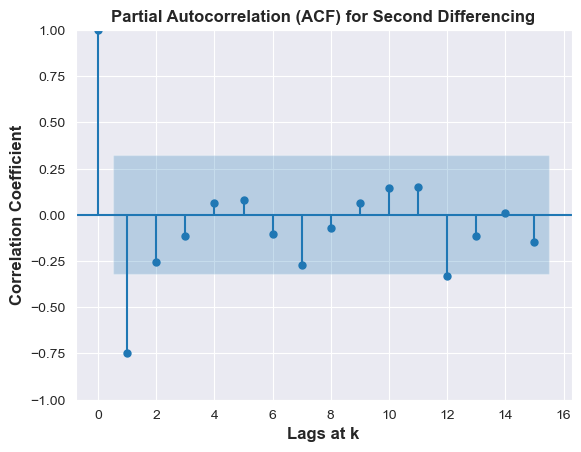

In [134]:
plot_pacf(secondDiff, lags = 15)
plt.title("Partial Autocorrelation (ACF) for Second Differencing", fontweight = "bold", fontsize = 12)
plt.xlabel("Lags at k", fontweight = "bold", fontsize = 12)
plt.ylabel("Correlation Coefficient", fontweight = "bold", fontsize = 12)
plt.show()

# the PACF shows significant lags to 1 time steps 

##### **Manual ARIMA**

In [135]:
train = hiv_df.iloc[0:34]
print(train)

    Year  Number of HIV Cases
38  1985                    2
37  1986                    7
36  1987                   10
35  1988                   15
34  1989                   10
33  1990                   17
32  1991                   42
31  1992                   55
30  1993                   64
29  1994                   86
28  1995                  111
27  1996                  139
26  1997                  173
25  1998                  199
24  1999                  206
23  2000                  226
22  2001                  237
21  2002                  234
20  2003                  242
19  2004                  311
18  2005                  317
17  2006                  359
16  2007                  423
15  2008                  456
14  2009                  463
13  2010                  441
12  2011                  461
11  2012                  469
10  2013                  454
9   2014                  456
8   2015                  455
7   2016                  408
6   2017  

In [136]:
test = hiv_df.iloc[34:39]
print(test)

   Year  Number of HIV Cases
4  2019                  323
3  2020                  261
2  2021                  250
1  2022                  202
0  2023                  209


##### **ARIMA Order = (1, 2, 1)**

In [137]:
train1 = train
test1 = test

In [138]:
# define a SARIMA model to the HIV cases training data with optimised ARIMA parameters 
model1 = SARIMAX(train1["Number of HIV Cases"], order=(1, 2, 1), simple_differencing=False)
# fit the model 
model_fit1 = model1.fit(disp=False)
# display the model summary
print(model_fit1.summary())

                                SARIMAX Results                                
Dep. Variable:     Number of HIV Cases   No. Observations:                   34
Model:                SARIMAX(1, 2, 1)   Log Likelihood                -153.603
Date:                 Thu, 02 Jan 2025   AIC                            313.207
Time:                         17:15:51   BIC                            317.604
Sample:                              0   HQIC                           314.664
                                  - 34                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5622      0.216     -2.600      0.009      -0.986      -0.138
ma.L1         -0.4080      0.331     -1.234      0.217      -1.056       0.240
sigma2       838.7742    175.324      4.784 

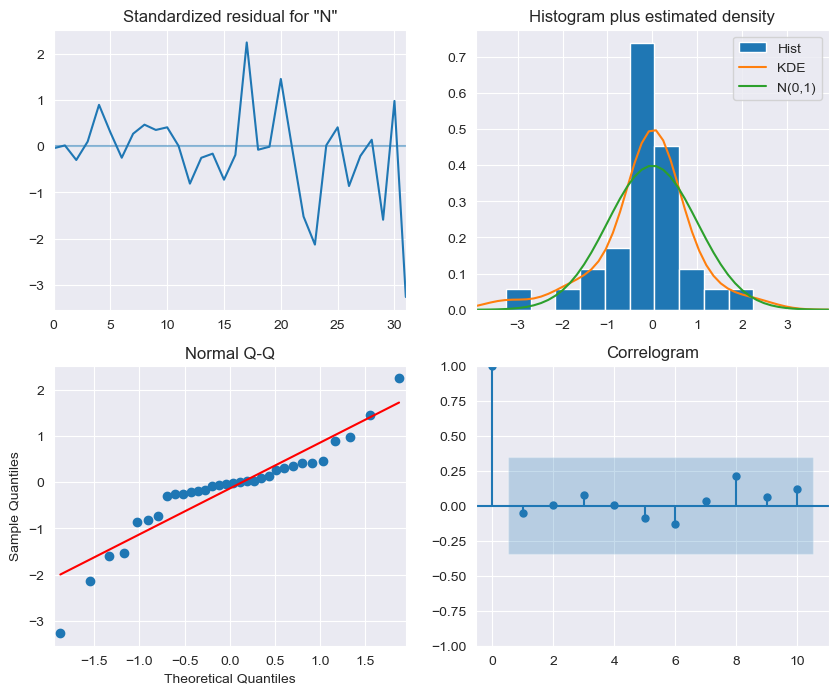

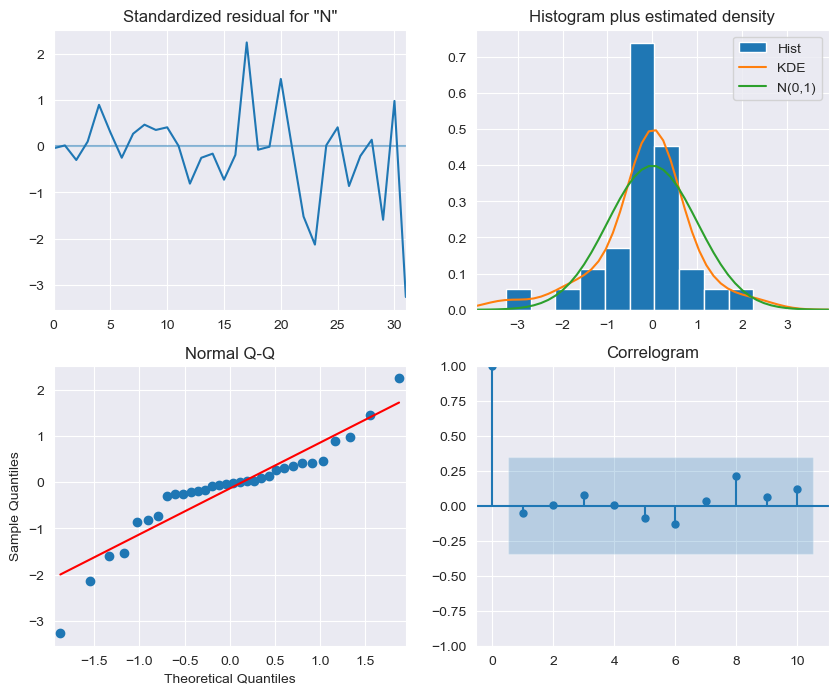

In [139]:
# plot a diagnostic plots for the fitted SARIMA model 
model_fit1.plot_diagnostics(figsize=(10,8))

In [140]:
# generate predictions
forecast1 = model_fit1.get_prediction(35, 39)

# extract mean forecast and confidence intervals
forecastMean1 = forecast1.predicted_mean
forecastConfInterval1 = forecast1.conf_int(alpha = 0.05)

# align indices if necessary
forecastMean1.index = test1.index[-len(forecastMean1):]
forecastConfInterval1.index = test1.index[-len(forecastConfInterval1):]

# assign predictions and confidence intervals to the DataFrame
test1["ARIMAPred"] = forecastMean1
test1["LowerBound"] = forecastConfInterval1.iloc[:, 0]
test1["UpperBound"] = forecastConfInterval1.iloc[:, 1]

# display the test data 
test1


,Year,Number of HIV Cases,ARIMAPred,LowerBound,UpperBound
4,2019,323,245.201797,163.723843,326.679751
3,2020,261,215.542296,93.318384,337.766209
2,2021,250,164.348987,2.335043,326.362931
1,2022,202,125.262759,-83.325566,333.851084
0,2023,209,79.369495,-178.083902,336.822891


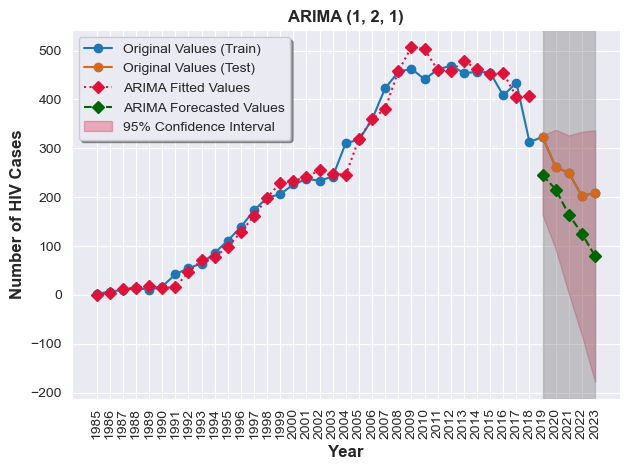

In [141]:
# plot the actual HIV cases data from the training set
# plot the actual HIV cases data from the testing set
# plot the ARIMA model prediction for the test set 

fig, ax = plt.subplots()
ax.plot(hiv_df['Year'], 
        hiv_df['Number of HIV Cases'], 
        marker = "o", 
        label = "Original Values (Train)")
ax.plot(test1['Year'], 
        test1['Number of HIV Cases'], 
        marker = "o",
        color = "chocolate",
        label = "Original Values (Test)")
ax.plot(train1['Year'], 
        model_fit1.fittedvalues, 
        linestyle = ":", 
        marker = "D",
        color = "crimson",
        label = "ARIMA Fitted Values")
ax.plot(test1['Year'], 
        test1['ARIMAPred'], 
        linestyle = "--", 
        marker = "D", 
        color = "darkgreen",
        label = "ARIMA Forecasted Values")
ax.fill_between(test1['Year'], 
                test1['LowerBound'], 
                test1['UpperBound'], 
                color = 'crimson', 
                alpha = 0.3, 
                label = "95% Confidence Interval")
ax.axvspan(34, 38, color='#808080', alpha=0.4)
plt.title("ARIMA (1, 2, 1)", fontweight = "bold", fontsize = 12)
plt.xlabel("Year", fontweight = "bold", fontsize = 12)
plt.ylabel("Number of HIV Cases", fontweight = "bold", fontsize = 12)
plt.xticks(rotation = 90)
plt.tight_layout()
ax.legend(shadow = True)
plt.show()

##### **ARIMA Order = (2, 2, 1)**

In [142]:
train2 = train
test2 = test

In [143]:
# define a SARIMA model to the HIV cases training data with optimised ARIMA parameters 
model2 = SARIMAX(train2["Number of HIV Cases"], order=(2, 2, 1), simple_differencing=False)
# fit the model 
model_fit2 = model2.fit(disp=False)
# display the model summary
print(model_fit2.summary())

                                SARIMAX Results                                
Dep. Variable:     Number of HIV Cases   No. Observations:                   34
Model:                SARIMAX(2, 2, 1)   Log Likelihood                -153.464
Date:                 Thu, 02 Jan 2025   AIC                            314.928
Time:                         17:15:51   BIC                            320.791
Sample:                              0   HQIC                           316.871
                                  - 34                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8206      0.735     -1.116      0.264      -2.261       0.620
ar.L2         -0.2714      0.663     -0.409      0.682      -1.572       1.029
ma.L1         -0.1426      0.888     -0.161 

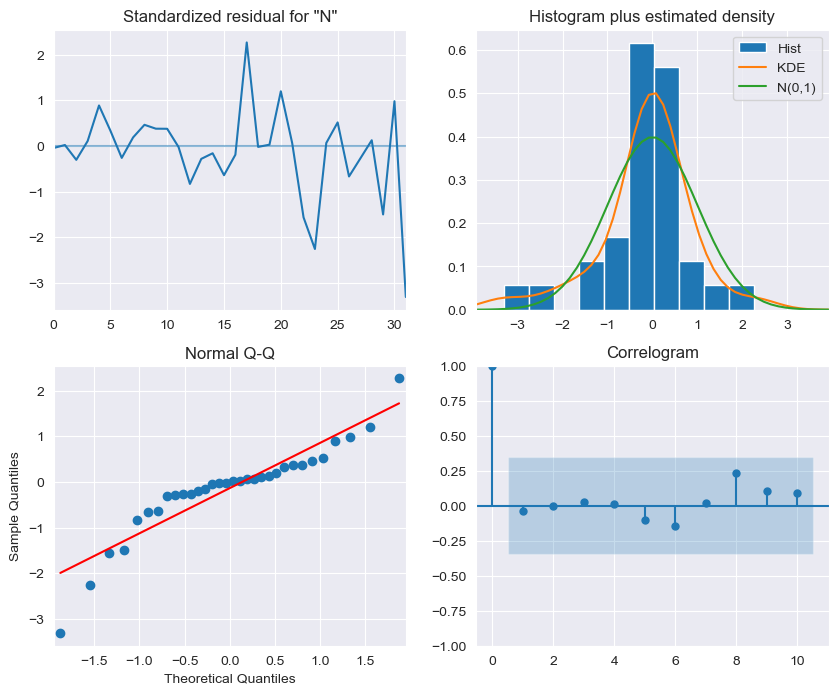

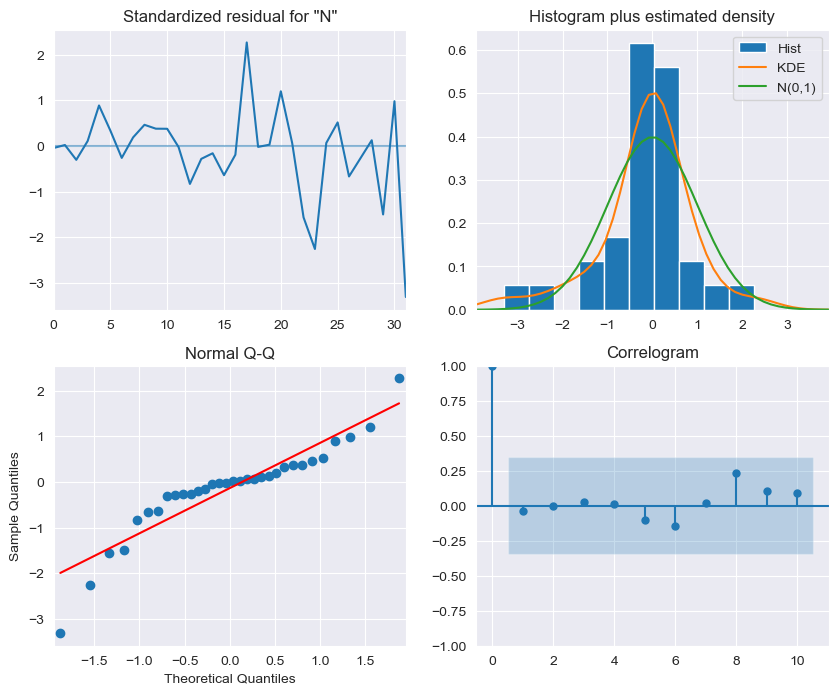

In [144]:
# plot a diagnostic plots for the fitted SARIMA model 
model_fit2.plot_diagnostics(figsize=(10,8))

In [145]:
# generate predictions
forecast2 = model_fit2.get_prediction(35, 39)

# extract mean forecast and confidence intervals
forecastMean2 = forecast2.predicted_mean
forecastConfInterval2 = forecast2.conf_int(alpha = 0.05)

# align indices if necessary
forecastMean2.index = test1.index[-len(forecastMean2):]
forecastConfInterval2.index = test1.index[-len(forecastConfInterval2):]

# assign predictions and confidence intervals to the DataFrame
test2["ARIMAPred"] = forecastMean2
test2["LowerBound"] = forecastConfInterval2.iloc[:, 0]
test2["UpperBound"] = forecastConfInterval2.iloc[:, 1]

# display the test data 
test2


,Year,Number of HIV Cases,ARIMAPred,LowerBound,UpperBound
4,2019,323,245.870722,164.419844,327.321599
3,2020,261,198.556412,77.134433,319.978392
2,2021,250,155.026063,-10.284406,320.336532
1,2022,202,104.793503,-107.987920,317.574926
0,2023,209,59.033546,-206.330894,324.397986


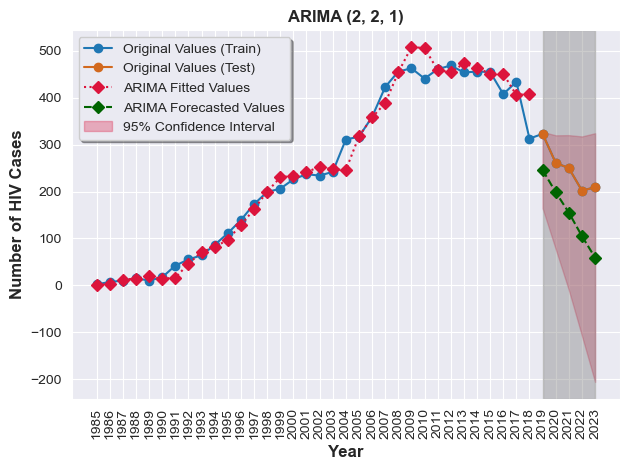

In [146]:
# plot the actual HIV cases data from the training set
# plot the actual HIV cases data from the testing set
# plot the ARIMA model prediction for the test set 

fig, ax = plt.subplots()
ax.plot(hiv_df['Year'], 
        hiv_df['Number of HIV Cases'], 
        marker = "o", 
        label = "Original Values (Train)")
ax.plot(test2['Year'], 
        test2['Number of HIV Cases'], 
        marker = "o",
        color = "chocolate",
        label = "Original Values (Test)")
ax.plot(train2['Year'], 
        model_fit2.fittedvalues, 
        linestyle = ":", 
        marker = "D",
        color = "crimson",
        label = "ARIMA Fitted Values")
ax.plot(test2['Year'], 
        test2['ARIMAPred'], 
        linestyle = "--", 
        marker = "D", 
        color = "darkgreen",
        label = "ARIMA Forecasted Values")
ax.fill_between(test2['Year'], 
                test2['LowerBound'], 
                test2['UpperBound'], 
                color = 'crimson', 
                alpha = 0.3, 
                label = "95% Confidence Interval")
ax.axvspan(34, 38, color='#808080', alpha=0.4)
plt.title("ARIMA (2, 2, 1)", fontweight = "bold", fontsize = 12)
plt.xlabel("Year", fontweight = "bold", fontsize = 12)
plt.ylabel("Number of HIV Cases", fontweight = "bold", fontsize = 12)
plt.xticks(rotation = 90)
plt.tight_layout()
ax.legend(shadow = True)
plt.show()

## **Grid-Search ARIMA Hyperparameters**

In [147]:
# create a function to evaluates an ARIMA model using AIC 
def evaluate_arima_aic(train, arima_order):
    # fit ARIMA model
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    # return the AIC
    return model_fit.aic

In [148]:
# create a function to evaluate the combinations of p, d, q values for an ARIMA model based on AIC scores 
def evaluate_models(train, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)

                try:
                    aic = evaluate_arima_aic(train, order)
                    if aic < best_score:
                        best_aic, best_cfg = aic, order
                    print("ARIMA: {}, AIC = {:.4f}".format(order, aic))
                except:
                    continue
                
                
    print("Best ARIMA: {}, AIC: {:.4f}".format(best_cfg, best_aic))

In [149]:
# extract target variable from the training and testing sets
train2 = train['Number of HIV Cases']

# define ranges for ARIMA model parameters 
p_values = range(0, 2)
d_values = range(0, 3)
q_values = range(0, 2)

# evaluate ARIMA models with different parameter combination 
evaluate_models(train2, p_values, d_values, q_values)

ARIMA: (0, 0, 0), AIC = 449.8271
ARIMA: (0, 0, 1), AIC = 411.3396
ARIMA: (0, 1, 0), AIC = 326.3625
ARIMA: (0, 1, 1), AIC = 327.6855
ARIMA: (0, 2, 0), AIC = 325.2554
ARIMA: (0, 2, 1), AIC = 314.8031
ARIMA: (1, 0, 0), AIC = 343.0616
ARIMA: (1, 0, 1), AIC = 344.2369
ARIMA: (1, 1, 0), AIC = 326.9944
ARIMA: (1, 1, 1), AIC = 324.7094
ARIMA: (1, 2, 0), AIC = 313.8186
ARIMA: (1, 2, 1), AIC = 313.2066
Best ARIMA: (1, 2, 1), AIC: 313.2066


In [156]:
# define a SARIMA model to the HIV cases training data with optimised ARIMA parameters 
model = SARIMAX(train["Number of HIV Cases"], order=(1, 2, 1), simple_differencing=False)
# fit the model 
model_fit = model.fit(disp=False)
# display the model summary
print(model_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     Number of HIV Cases   No. Observations:                   34
Model:                SARIMAX(1, 2, 1)   Log Likelihood                -153.603
Date:                 Thu, 02 Jan 2025   AIC                            313.207
Time:                         17:16:29   BIC                            317.604
Sample:                              0   HQIC                           314.664
                                  - 34                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5622      0.216     -2.600      0.009      -0.986      -0.138
ma.L1         -0.4080      0.331     -1.234      0.217      -1.056       0.240
sigma2       838.7742    175.324      4.784 

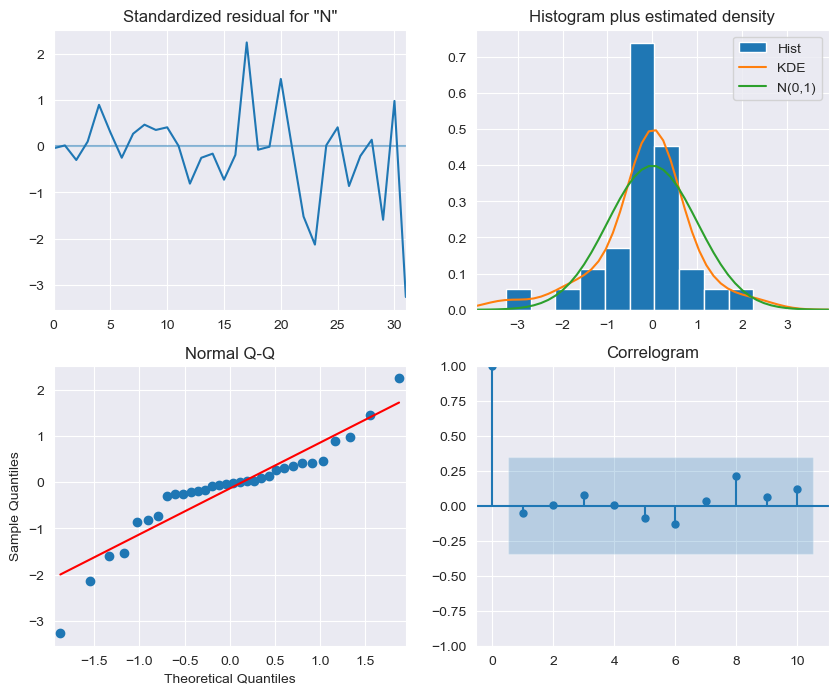

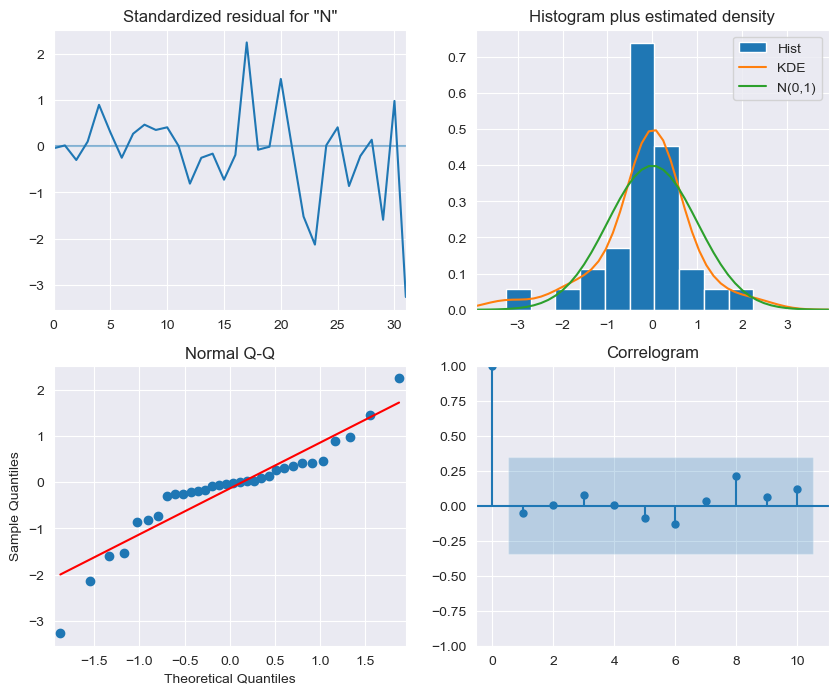

In [151]:
# plot a diagnostic plots for the fitted SARIMA model 
model_fit.plot_diagnostics(figsize=(10,8))

In [152]:
# compute the residuals from the fitted model
residuals = model_fit.resid 
# perform Ljung-box test for autocorrelation up to 10 lags
res = acorr_ljungbox(residuals, np.arange(1, 11, 1), return_df = True)
# display the results of the Ljung-box test
res

,lb_stat,lb_pvalue
1,0.096402,0.756191
2,0.098149,0.952110
3,0.300559,0.959923
4,0.301108,0.989743
5,0.571356,0.989277
6,1.237205,0.975007
7,1.298031,0.988492
8,3.411382,0.905957
9,3.661562,0.932244
10,4.498072,0.922094


In [153]:
# generate predictions
forecast = model_fit.get_prediction(35, 39)

# extract mean forecast and confidence intervals
forecastMean = forecast.predicted_mean
forecastConfInterval = forecast.conf_int(alpha = 0.05)

# align indices if necessary
forecastMean.index = test.index[-len(forecastMean):]
forecastConfInterval.index = test.index[-len(forecastConfInterval):]

# assign predictions and confidence intervals to the DataFrame
test["ARIMAPred"] = forecastMean
test["LowerBound"] = forecastConfInterval.iloc[:, 0]
test["UpperBound"] = forecastConfInterval.iloc[:, 1]

# display the test data 
test


,Year,Number of HIV Cases,ARIMAPred,LowerBound,UpperBound
4,2019,323,245.201797,163.723843,326.679751
3,2020,261,215.542296,93.318384,337.766209
2,2021,250,164.348987,2.335043,326.362931
1,2022,202,125.262759,-83.325566,333.851084
0,2023,209,79.369495,-178.083902,336.822891


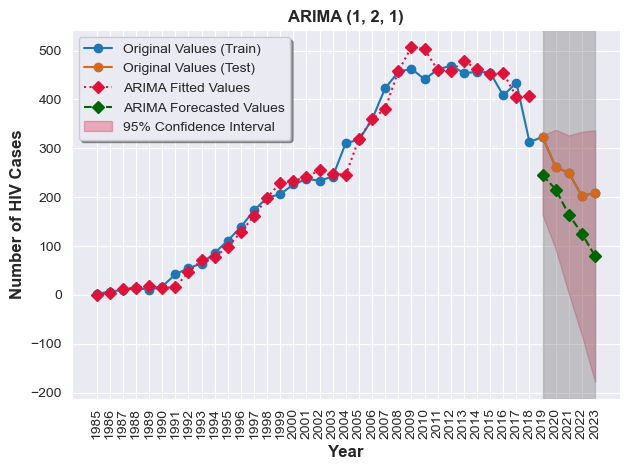

In [154]:
# plot the actual HIV cases data from the training set
# plot the actual HIV cases data from the testing set
# plot the ARIMA model prediction for the test set 

fig, ax = plt.subplots()
ax.plot(hiv_df['Year'], 
        hiv_df['Number of HIV Cases'], 
        marker = "o", 
        label = "Original Values (Train)")
ax.plot(test['Year'], 
        test['Number of HIV Cases'], 
        marker = "o",
        color = "chocolate",
        label = "Original Values (Test)")
ax.plot(train['Year'], 
        model_fit.fittedvalues, 
        linestyle = ":", 
        marker = "D",
        color = "crimson",
        label = "ARIMA Fitted Values")
ax.plot(test['Year'], 
        test['ARIMAPred'], 
        linestyle = "--", 
        marker = "D", 
        color = "darkgreen",
        label = "ARIMA Forecasted Values")
ax.fill_between(test['Year'], 
                test['LowerBound'], 
                test['UpperBound'], 
                color = 'crimson', 
                alpha = 0.3, 
                label = "95% Confidence Interval")
ax.axvspan(34, 38, color='#808080', alpha=0.4)
plt.title("ARIMA (1, 2, 1)", fontweight = "bold", fontsize = 12)
plt.xlabel("Year", fontweight = "bold", fontsize = 12)
plt.ylabel("Number of HIV Cases", fontweight = "bold", fontsize = 12)
plt.xticks(rotation = 90)
plt.tight_layout()
ax.legend(shadow = True)
plt.show()